In [1]:
# Program to plot Sea Level
#  Plots sea-level and applies Butterworth
#   and FFT low-pass filters
#
# Joseph B. Zambon
# 9 April 2017

In [2]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy import signal
import numpy.fft as fft

In [3]:
# For inline plotting
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Load sea_level.csv file
sea_level = pd.read_csv('sea_level.csv', sep=',',header=0)

In [5]:
# Clear arrays to append to
time_ar = []
sea_m = []

In [6]:
# Run through all rows and extract data as datetime and sea level in m
for t in range(0,sea_level.values[:,0].size):
    time_ar.append(datetime.datetime.strptime(sea_level.values[t,0],'%Y-%m-%d %H:%M'))
    sea_m.append(sea_level.values[t,1])

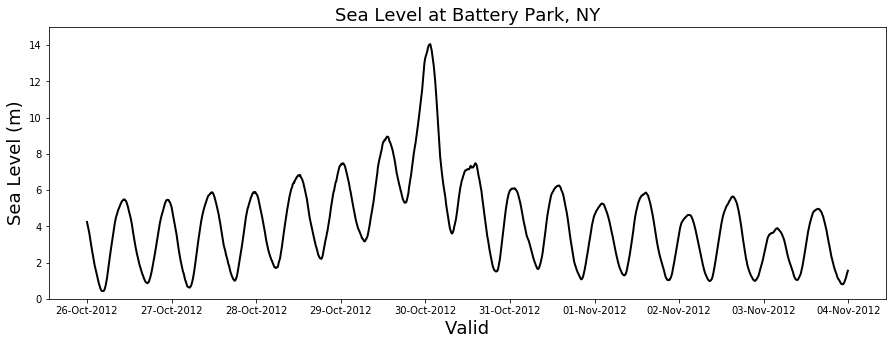

In [7]:
figsize(15,5)
fig, ax = plt.subplots()
ax.plot(time_ar,sea_m,'-',linewidth=2,color='k')
ax.set_ylim([0,15])
ax.set_ylabel('Sea Level (m)', fontsize=18)
ax.set_xlabel('Valid', fontsize=18)
ax.set_title('Sea Level at Battery Park, NY', fontsize=18)

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d-%b-%Y'))

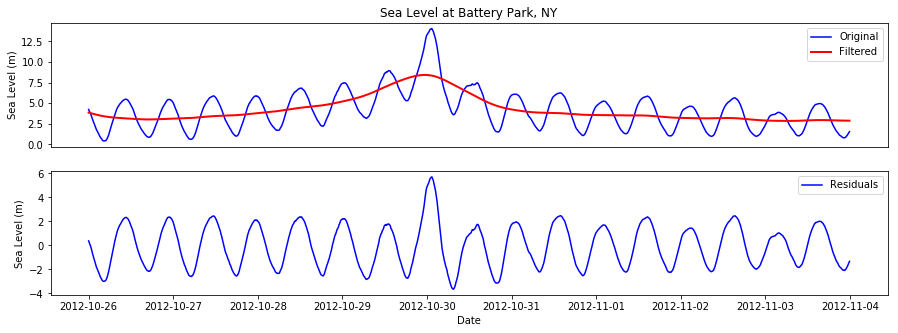

In [11]:
# Butterworth Filter

# First, design the Buterworth filter
N  = 2    # Filter order
Wn = 0.005 # Cutoff frequency, higher = less filtering
B, A = signal.butter(N, Wn, btype='lowpass',output='ba')
# Second, apply the filter
sea_butterworth = signal.filtfilt(B, A, sea_m)

# Make plots
fig = plt.figure()
ax1 = fig.add_subplot(211)
plt.plot(time_ar,sea_m, 'b-')
plt.plot(time_ar,sea_butterworth, 'r-',linewidth=2)
plt.ylabel("Sea Level (m)")
plt.legend(['Original','Filtered'])
plt.title("Sea Level at Battery Park, NY")
ax1.axes.get_xaxis().set_visible(False)
 
ax1 = fig.add_subplot(212)
plt.plot(time_ar,sea_m-sea_butterworth, 'b-')
plt.ylabel("Sea Level (m)")
plt.xlabel("Date")
plt.legend(['Residuals'])

In [9]:
def fft_lowpass(nelevation, low_bound, high_bound):
    """ Performs a low pass filer on the nelevation series.
    low_bound and high_bound specifes the boundary of the filter.
    """
    if len(nelevation) % 2:
        result = fft.rfft(nelevation, len(nelevation))
    else:
        result = fft.rfft(nelevation)
    freq = fft.fftfreq(len(nelevation))[:len(nelevation)/2]
    factor = np.ones_like(result)
    factor[freq > low_bound] = 0.0

    sl = np.logical_and(high_bound < freq, freq < low_bound)

    a = factor[sl]
    # Create float array of required length and reverse
    a = np.arange(len(a) + 2).astype(float)[::-1]

    # Ramp from 1 to 0 exclusive
    a = (a/a[0])[1:-1]

    # Insert ramp into factor
    factor[sl] = a

    result = result * factor
    print 'result=', len(result)
    relevation = fft.irfft(result, len(nelevation))
    print 'result=', len(relevation)
    return relevation


result= 1081
result= 2160


/Users/joezambon/anaconda/envs/experiment1/lib/python2.7/site-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1081 but corresponding boolean dimension is 1080
  # This is added back by InteractiveShellApp.init_path()
/Users/joezambon/anaconda/envs/experiment1/lib/python2.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1081 but corresponding boolean dimension is 1080
  from ipykernel import kernelapp as app
/Users/joezambon/anaconda/envs/experiment1/lib/python2.7/site-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1081 but corresponding boolean dimension is 1080


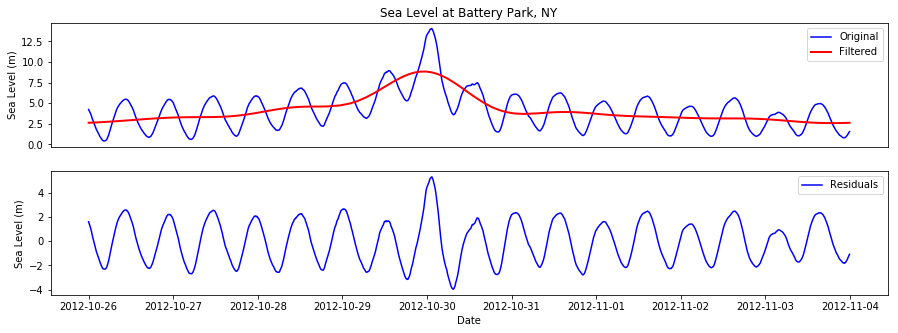

In [10]:
#Fast-Fourier Transform Filter
#  See:  1981, 'Removing Tidal-Period Variations from Time-Series Data
#               Using Low Pass Filters' by Roy Walters and Cythia Heston, in
#               Physical Oceanography, Volume 12, pg 112.
# FFT Transform ramp to 0 in frequency domain from 40 to 30 hours

# Design Filter
low_fft  = 1/30.0/10.0  #30 hours, 10 samples/hr
high_fft = 1/40.0/10.0  #40 hours, 10 samples/hr

sea_fft = fft_lowpass(sea_m,low_fft,high_fft)
fig = plt.figure()
ax1 = fig.add_subplot(211)
plt.plot(time_ar,sea_m, 'b-')
plt.plot(time_ar,sea_fft, 'r-',linewidth=2)
plt.ylabel("Sea Level (m)")
plt.legend(['Original','Filtered'])
plt.title("Sea Level at Battery Park, NY")
ax1.axes.get_xaxis().set_visible(False)
 
ax1 = fig.add_subplot(212)
plt.plot(time_ar,sea_m-sea_fft, 'b-')
plt.ylabel("Sea Level (m)")
plt.xlabel("Date")
plt.legend(['Residuals'])